# HEART DISEASE PREDICTION  USING KNN CLASSIFIER 


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [69]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0=pd.read_csv(r'C:\Users\Ashwin Avinash Andey\Desktop\ML_project\heart_disease.csv',names=columns)
df0.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [70]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age        299 non-null float64
sex        299 non-null float64
cp         299 non-null float64
restbp     299 non-null float64
chol       299 non-null float64
fbs        299 non-null float64
restecg    299 non-null float64
thalach    299 non-null float64
exang      299 non-null float64
oldpeak    299 non-null float64
slope      299 non-null float64
ca         299 non-null float64
thal       299 non-null float64
num        299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


In [71]:
df0.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


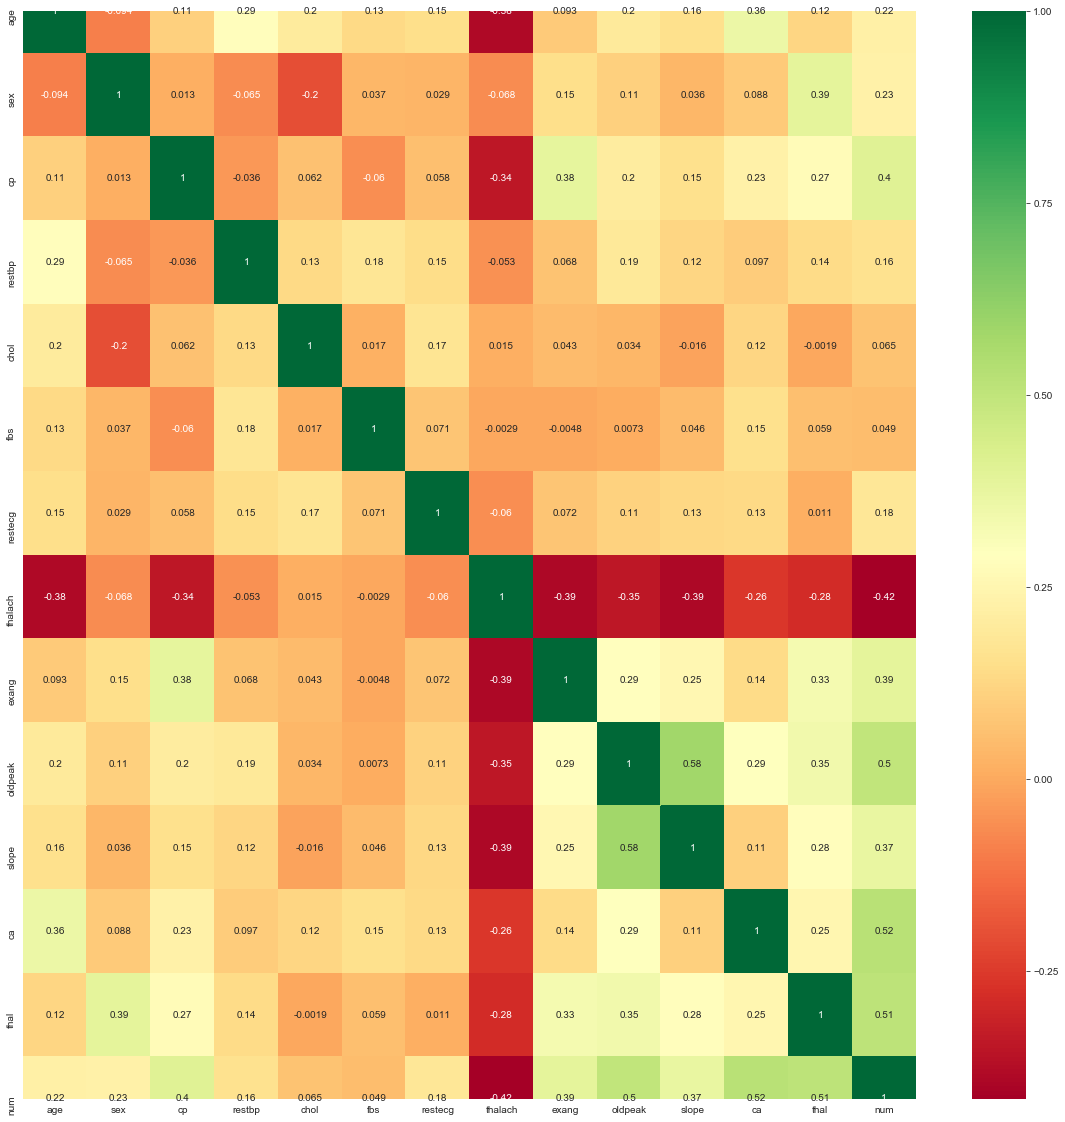

In [89]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df0.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df0[top_corr_features].corr(),annot=True,cmap="RdYlGn")

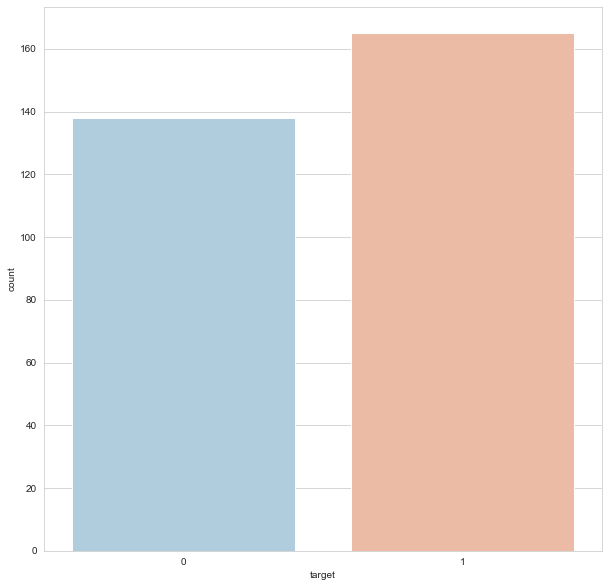

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df1,palette='RdBu_r')

In [75]:
dataset = pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [77]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [78]:
# Converting categorial values into discrete values
#Note that feature ca is discrete but not categorical, so we don't convert it.
df = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

#Replace response variable values and renaming it hd
#The num variable values of 1,2,3,4 are replaced with 1 in order to signify that the patient has heart disease
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df = df.rename(columns = {"num":"hd"})

new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
df_model = df.copy()
df_model = df_model.reindex(columns=new_columns_2)


scaler = MinMaxScaler()
features = [['age', 'restbp', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

# Convert dataframe into lists for use by classifiers
print(df_model.head())

yall = df_model["hd"]
Xall = df_model[new_columns_2[1:]].values

# droping insignificant columns

model = ExtraTreesClassifier(n_estimators=10)
model.fit(Xall, yall)

print()
print("importance of the features:")
print(model.feature_importances_)




Number of patients in dataframe: 299, with disease: 139, without disease: 160

    hd       age  sex    restbp      chol  fbs   thalach  exang   oldpeak  \
0  0.0  0.708333  1.0  0.481132  0.286638  1.0  0.603053    0.0  0.370968   
1  1.0  0.791667  1.0  0.622642  0.400862  0.0  0.282443    1.0  0.241935   
2  1.0  0.791667  1.0  0.245283  0.278017  0.0  0.442748    1.0  0.419355   
3  0.0  0.166667  1.0  0.339623  0.323276  0.0  0.885496    0.0  0.564516   
4  0.0  0.250000  0.0  0.339623  0.224138  0.0  0.770992    0.0  0.225806   

    ca  cp_1  cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0  0.0     1     0     0       0       1        0        1       1       0  
1  3.0     0     0     0       0       1        0        0       0       0  
2  2.0     0     0     0       0       1        0        0       0       1  
3  0.0     0     0     1       0       0        0        1       0       0  
4  0.0     0     1     0       0       1        1        0       0      

In [79]:
#selecting important features
yall = df_model['hd']
Xall = df_model.iloc[:,[2, 3, 6, 9, 10, 11, 12, 15, 18]].values
print(df_model.iloc[:,[2,3,6,9,10,11,12,15,18]])

     sex    restbp   thalach   ca  cp_1  cp_2  cp_3  slope_1  thal_7
0    1.0  0.481132  0.603053  0.0     1     0     0        0       0
1    1.0  0.622642  0.282443  3.0     0     0     0        0       0
2    1.0  0.245283  0.442748  2.0     0     0     0        0       1
3    1.0  0.339623  0.885496  0.0     0     0     1        0       0
4    0.0  0.339623  0.770992  0.0     0     1     0        1       0
..   ...       ...       ...  ...   ...   ...   ...      ...     ...
294  1.0  0.471698  0.534351  2.0     0     0     0        0       1
295  1.0  0.339623  0.335878  1.0     0     0     0        0       1
296  0.0  0.339623  0.786260  1.0     0     1     0        0       0
297  1.0  0.528302  0.206107  0.0     0     0     0        0       1
298  1.0  0.245283  0.374046  0.0     0     0     0        0       1

[299 rows x 9 columns]


In [80]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

accuracy is : 96.82539682539682


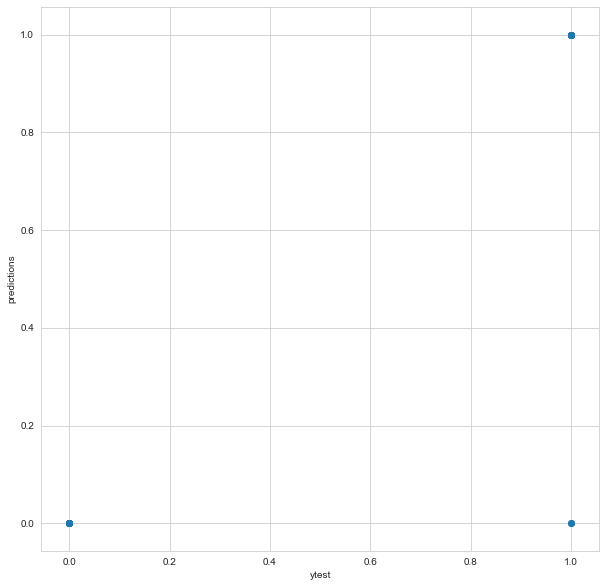

In [81]:
x_normalized = preprocessing.scale(Xall)

xTrain, xTest, yTrain, yTest = train_test_split(x_normalized, yall, test_size=0.21, random_state=29)

knn = KNeighborsClassifier(6)
knn.fit(xTrain, yTrain)
predictions = knn.predict(xTest)

print('accuracy is :',accuracy_score(yTest, predictions)*100)

plt.scatter(yTest, predictions)
plt.xlabel('ytest')
plt.ylabel('predictions')
plt.show()


In [82]:
print('\nClassification report on full data set:')
print(classification_report(yTest,predictions))
print("mean squared error is :", mean_squared_error(yTest, predictions))
print("mean absolute error is :", mean_absolute_error(yTest, predictions))


Classification report on full data set:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        28
         1.0       1.00      0.94      0.97        35

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

mean squared error is : 0.031746031746031744
mean absolute error is : 0.031746031746031744


In [ ]:
df1 = pd.read_csv(r'C:\Users\Ashwin Avinash Andey\Desktop\ML_project\dataset.csv')

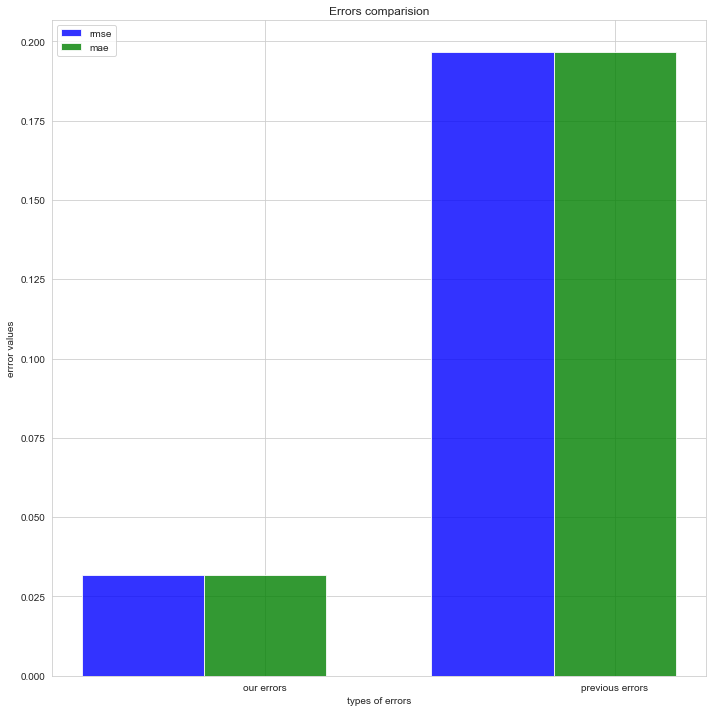

In [83]:
a = 0.031746031746031744
b = 0.19672131147540983

our_errors = [a,b]
previous_errors = [a,b]

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, our_errors, bar_width,
alpha=opacity,
color='b',
label='rmse')

rects2 = plt.bar(index + bar_width, previous_errors, bar_width,
alpha=opacity,
color='g',
label='mae')

plt.xlabel('types of errors')
plt.ylabel('errror values')
plt.title('Errors comparision')
plt.xticks(index + bar_width, ('our errors', 'previous errors'))
plt.legend()
plt.tight_layout()
plt.savefig('abcd.png')
plt.show()


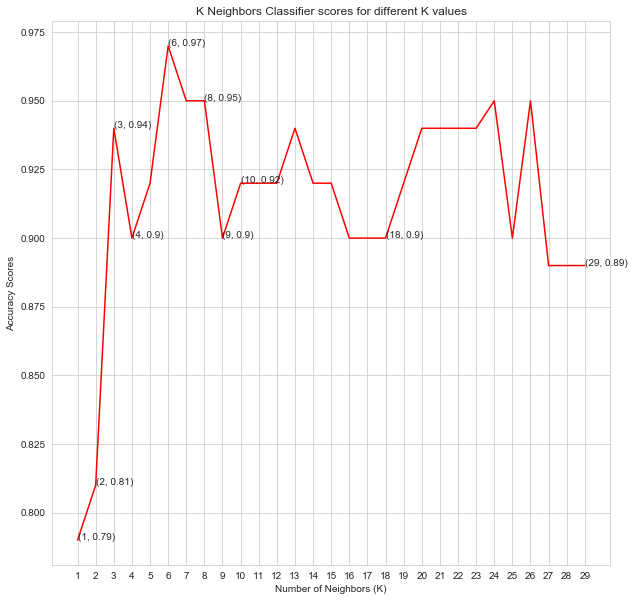

In [84]:
knn_scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xTrain, yTrain)
    predictions = knn.predict(xTest)
    score= accuracy_score(yTest, predictions)
    knn_scores.append(round(score,2))
   
                      
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in [1,2,3,4,6,8,9,10,18,29]:
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.savefig('accuracy-score vs k-value')

In [85]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_normalized,yall,cv=10)
    knn_scores.append(round(score.mean(),2))
print(knn_scores)

[0.75, 0.78, 0.82, 0.83, 0.83, 0.83, 0.83, 0.82, 0.84, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.85, 0.84, 0.84, 0.85, 0.85, 0.85, 0.84, 0.85, 0.86, 0.85, 0.85, 0.86]


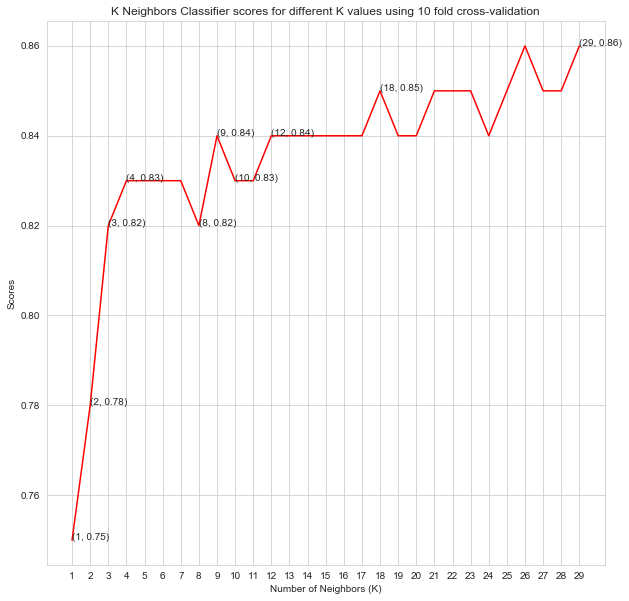

In [86]:
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in [1,2,3,4,8,9,10,12,18,29]:
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values using 10 fold cross-validation')
plt.savefig('accuracy-score vs knn using 10 fold cross validation.png')

accuracy is : 79.36507936507937
accuracy is : 80.95238095238095
accuracy is : 93.65079365079364
accuracy is : 90.47619047619048
accuracy is : 92.06349206349206
accuracy is : 96.82539682539682
accuracy is : 95.23809523809523
accuracy is : 95.23809523809523
accuracy is : 90.47619047619048
accuracy is : 92.06349206349206
accuracy is : 92.06349206349206
accuracy is : 92.06349206349206
accuracy is : 93.65079365079364
accuracy is : 92.06349206349206


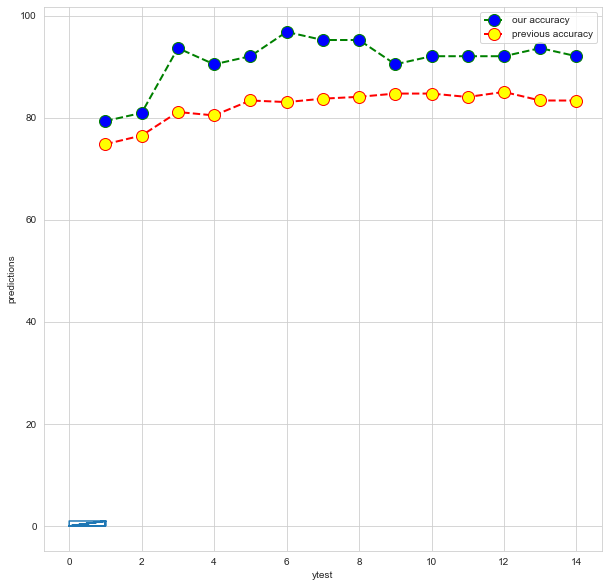

In [87]:
accuracy=[]
knn_scores = []
for i in range (1,15,1):
    knn = KNeighborsClassifier(i)
    knn.fit(xTrain, yTrain)
    predictions = knn.predict(xTest)
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean()*100)
   # knn_scores

    print('accuracy is :', accuracy_score(yTest, predictions)*100)
    accuracy.append(accuracy_score(yTest, predictions)*100)

k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(k,accuracy,label="our accuracy",color="green",linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.plot(k,knn_scores,color="red",label="previous accuracy",linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='yellow', markersize=12)

plt.plot(yTest, predictions)
plt.xlabel('ytest')
plt.ylabel('predictions')
plt.legend() 
plt.show()
